In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/yuked123/schulich_datascience/main/messy_data.csv?token=GHSAT0AAAAAACCEAI3XKP54MB2DF4A2TKXWZDFPHPQ')

In [8]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [13]:
df.describe(include = 'all')

# outlier - Age - Max is 120


,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [14]:
# visualization 

import seaborn as sns

<AxesSubplot:xlabel='Income', ylabel='Count'>

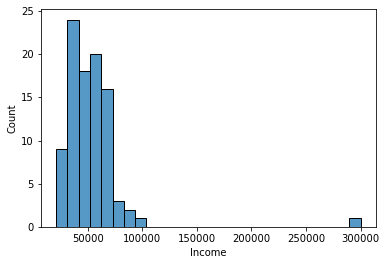

In [15]:
# histogram, whisker box plot using seaborn 
# installing a package -- pip install seaborn 

# correlation coefficient - how strongly two variables are correlated - can be shown on a graph 
# linear relationship - move homogeneously 

# histogram 

sns.histplot(df['Income'])

# frequency graph - giving ranges of this category 
# help to assess the distribution of this dataset 
# one outlier - we can remove it - but there are certain circumstances - where we should keep them 

c:\Users\kryst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

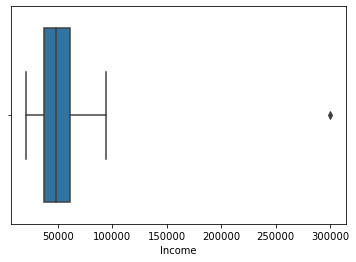

In [16]:
sns.boxplot(df['Income'])

# to drop the outlier - need to find out its index number 

In [22]:
df[df['Income'] >  250000]

# found out outlier - its index 

,Age,Income,Gender,Product,Quantity
99,61,300000.0,Male,B,4


In [23]:
df.drop(99, axis = 0, inplace = True)
# dropped outlier - change is permanent 

c:\Users\kryst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

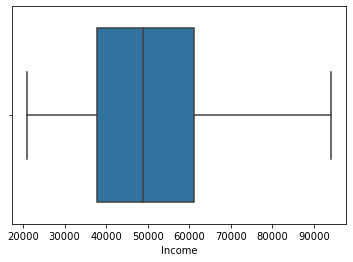

In [24]:
sns.boxplot(df['Income'])

# no more outlier 

<AxesSubplot:xlabel='Income', ylabel='Count'>

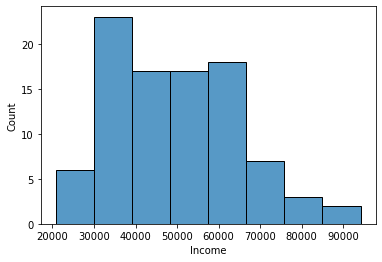

In [25]:
sns.histplot(df['Income'])

<AxesSubplot:xlabel='Gender', ylabel='Income'>

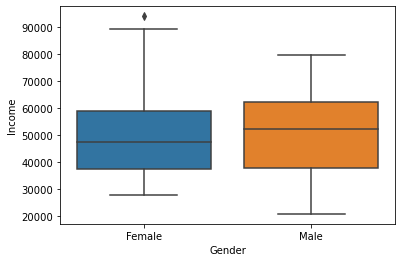

In [26]:
sns.boxplot(data = df, x = "Gender", y = "Income")

# x - categorical variable -- female and male - comaring these two categories 
# y - numerical variable - income - group by genders 

# there is now a new outlier - in the female group 
# by its meaning - remove it or not - decide later 

<AxesSubplot:xlabel='Age', ylabel='Income'>

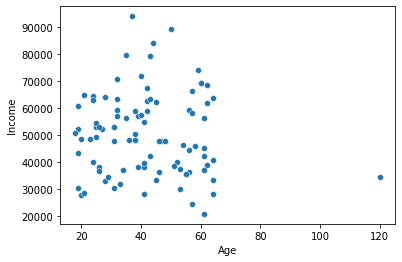

In [27]:
sns.scatterplot(x = "Age", y = "Income", data = df)

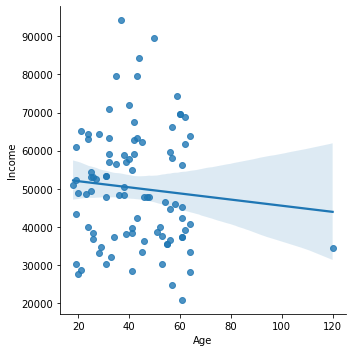

In [30]:
sns.lmplot(x = "Age", y = "Income", data = df, fit_reg = True)

# fig_reg - adding a trend line - best fit 
# found an outlier at 120

In [31]:
df.drop(df[df['Age'] == 120].index, axis = 0, inplace = True)

# dropping the outlier which the age is 120 based on its index

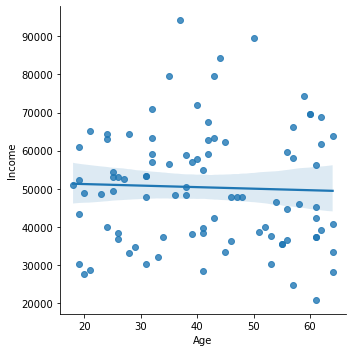

In [32]:
sns.lmplot(x = "Age", y = "Income", data = df, fit_reg = True)

# outlier is gone 


In [33]:
df.drop_duplicates(inplace = True)
# add parameter - subset = -- remove certain cells 
# dropping duplicates 

In [34]:
# fill in missing values 
df.info()
# Income and Product both have missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [35]:
df['Product'] = df['Product'].fillna("Other")

# fill in the missing values with a value we set 

In [37]:
df.groupby('Gender')['Income'].mean()

Gender
Female    50205.793962
Male      50795.175595
Name: Income, dtype: float64

In [38]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [39]:
df['Income'] = df['Income'].fillna(df['Income'].mean())


In [40]:
df.info()
# now no values are missing - no null anymore 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    98 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   98 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB
